In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("dataset_clean_normalized.csv")
print(df.dtypes)


Saving dataset_clean_normalized.csv to dataset_clean_normalized (1).csv
timestamp               object
WeekDay                float64
CPU_Usage_Pct          float64
RAM_Usage_Pct          float64
ESP32_Temperature_C    float64
humidity               float64
Active_Power_W         float64
Active_Energy_kWh      float64
Voltage_V              float64
Current_A              float64
Frequency_Hz           float64
Power_Factor           float64
CPU_Power_Pct          float64
CPU_Temp_Pct           float64
energy_source           object
dtype: object


In [4]:
# 1️⃣ Définir target et features
y = df['Active_Power_W']
X = df.drop(columns=['Active_Power_W'])

# 2️⃣ Définir les proxies à supprimer
proxies = ['Current_A', 'Voltage_V', 'Power_Factor']

# 3️⃣ Créer les deux versions
X_with_proxies = X.copy()
X_without_proxies = X.drop(columns=proxies)

print("✅ Deleted columns :", proxies)
print("➡️ X_with_proxies shape :", X_with_proxies.shape)
print("➡️ X_without_proxies shape :", X_without_proxies.shape)


✅ Deleted columns : ['Current_A', 'Voltage_V', 'Power_Factor']
➡️ X_with_proxies shape : (184426, 14)
➡️ X_without_proxies shape : (184426, 11)


Linear Regression results:
RMSE: 0.01
MAE: 0.00
R²: 0.9977


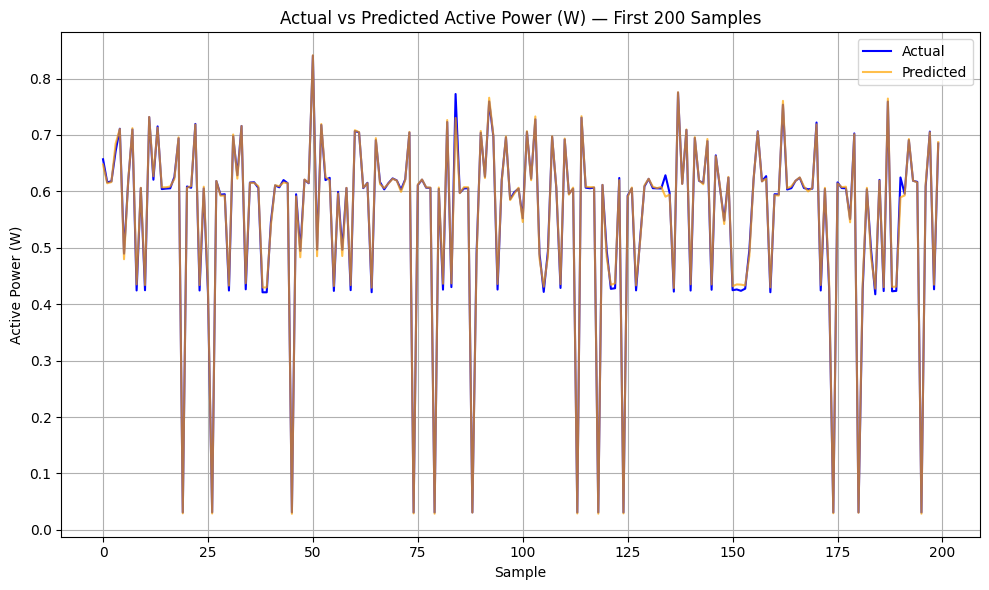

Model saved as 'linear_regression_model.pkl'


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

# 1. Load the dataset
df = pd.read_csv("dataset_clean_normalized.csv")

# 2. Convert 'timestamp' to datetime and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)

# 3. One-hot encode the 'energy_source' categorical column
df = pd.get_dummies(df, columns=['energy_source'])

# 4. Define target and features
y = df['Active_Power_W']
X = df.drop(columns=['Active_Power_W'])

# 5. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)

# 8. Evaluate model performance (compatible with older sklearn)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# 9. Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:200], label="Actual", color='blue')
plt.plot(y_pred[:200], label="Predicted", color='orange', alpha=0.7)
plt.title("Actual vs Predicted Active Power (W) — First 200 Samples")
plt.xlabel("Sample")
plt.ylabel("Active Power (W)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 10. Save the trained model
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved as 'linear_regression_model.pkl'")

✅ Linear Regression results (without proxies):
RMSE: 0.1122
MAE: 0.0664
R²: 0.5252


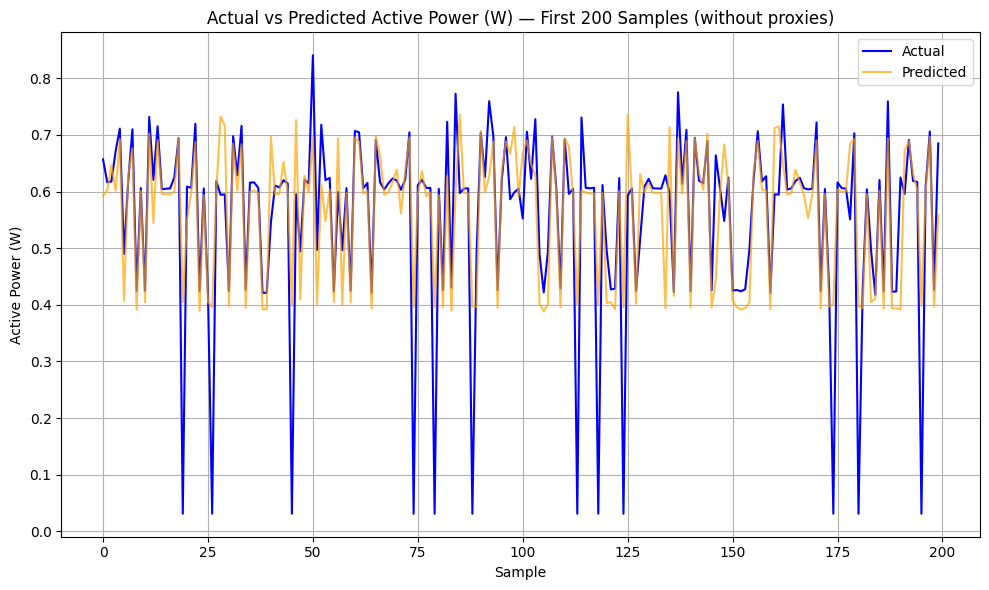

✅ Model saved as 'linear_regression_model_without_proxies.pkl'


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

# 1. Load the dataset
df = pd.read_csv("dataset_clean_normalized.csv")

# 2. Convert 'timestamp' to datetime and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)

# 3. One-hot encode the 'energy_source' categorical column
df = pd.get_dummies(df, columns=['energy_source'])

# 4. Define target and full features
y = df['Active_Power_W']
X = df.drop(columns=['Active_Power_W'])

# 5. Define proxies to remove
proxies = ['Current_A', 'Voltage_V', 'Power_Factor']

# 6. Create version without proxies
X_without_proxies = X.drop(columns=proxies)

# 7. Split data into training and test sets (without proxies)
X_train, X_test, y_train, y_test = train_test_split(
    X_without_proxies, y, test_size=0.2, random_state=42
)

# 8. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Predict on test set
y_pred = model.predict(X_test)

# 10. Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Linear Regression results (without proxies):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 11. Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:200], label="Actual", color='blue')
plt.plot(y_pred[:200], label="Predicted", color='orange', alpha=0.7)
plt.title("Actual vs Predicted Active Power (W) — First 200 Samples (without proxies)")
plt.xlabel("Sample")
plt.ylabel("Active Power (W)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Save the trained model
joblib.dump(model, "linear_regression_model_without_proxies.pkl")
print("✅ Model saved as 'linear_regression_model_without_proxies.pkl'")


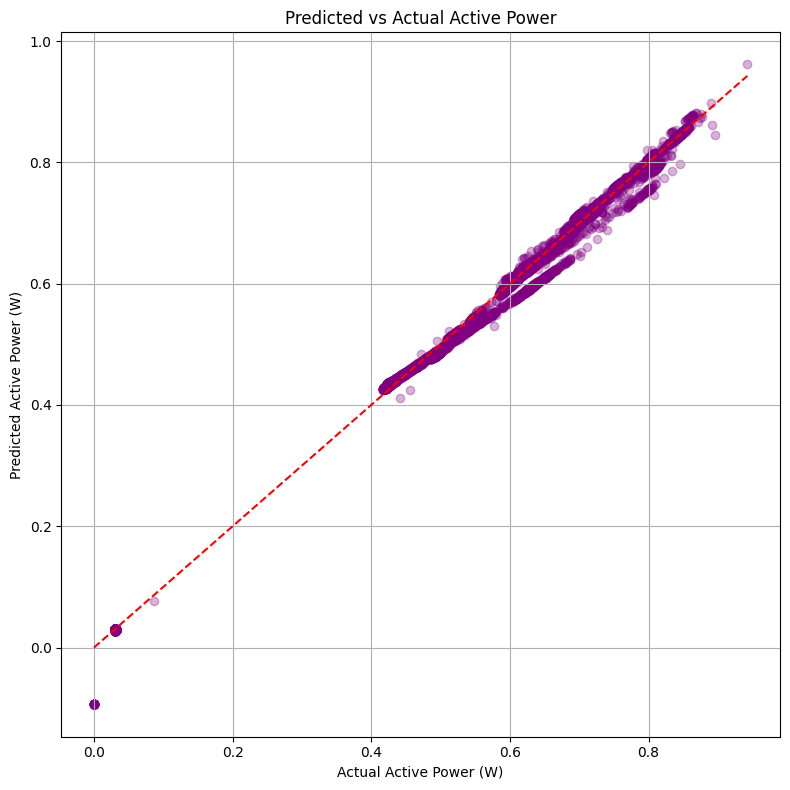

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line y=x
plt.xlabel("Actual Active Power (W)")
plt.ylabel("Predicted Active Power (W)")
plt.title("Predicted vs Actual Active Power")
plt.grid(True)
plt.tight_layout()
plt.show()


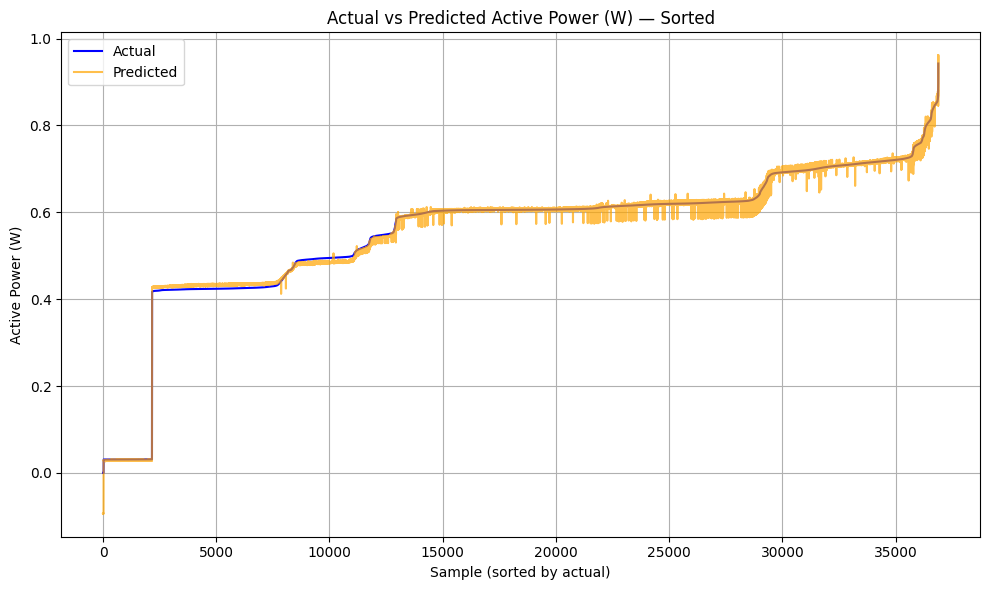

In [9]:
import numpy as np

sorted_idx = np.argsort(y_test.values)
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[sorted_idx], label="Actual", color='blue')
plt.plot(np.array(y_pred)[sorted_idx], label="Predicted", color='orange', alpha=0.7)
plt.title("Actual vs Predicted Active Power (W) — Sorted")
plt.xlabel("Sample (sorted by actual)")
plt.ylabel("Active Power (W)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Random Forest results (without proxies):
RMSE: 0.0216
MAE: 0.0063
R²: 0.9823


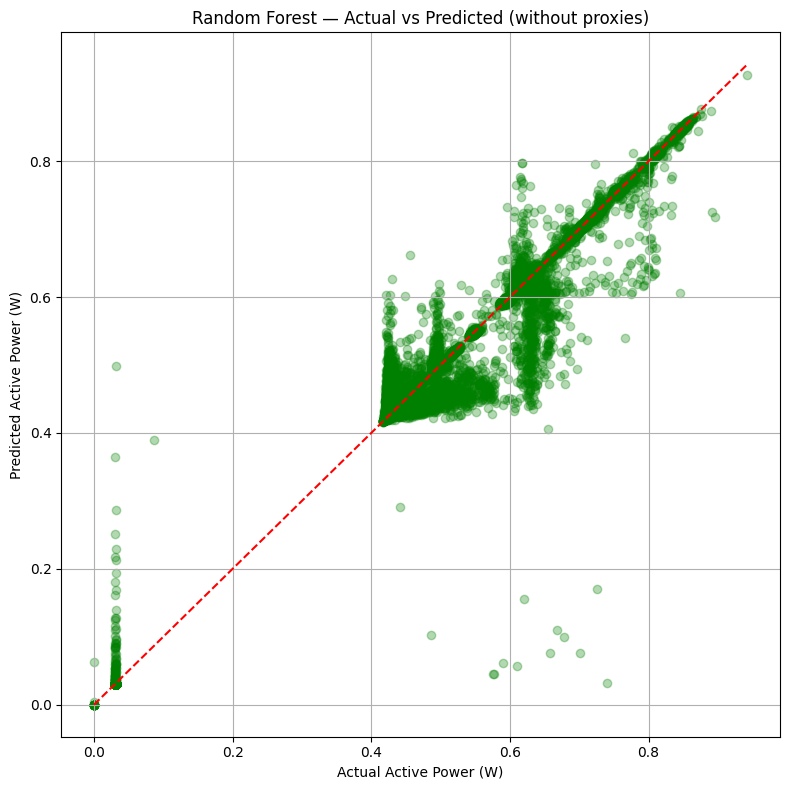

✅ Model saved as 'random_forest_model_without_proxies.pkl'


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import joblib

# 1. Load the dataset
df = pd.read_csv("dataset_clean_normalized.csv")

# 2. Convert 'timestamp' to datetime and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)

# 3. One-hot encode the 'energy_source' categorical column
df = pd.get_dummies(df, columns=['energy_source'])

# 4. Define target and full features
y = df['Active_Power_W']
X = df.drop(columns=['Active_Power_W'])

# 5. Define proxies to remove
proxies = ['Current_A', 'Voltage_V', 'Power_Factor']

# 6. Create version without proxies
X_without_proxies = X.drop(columns=proxies)

# 7. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_without_proxies, y, test_size=0.2, random_state=42
)

# 8. Train Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 9. Predict on test set
y_pred = rf_model.predict(X_test)

# 10. Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Random Forest results (without proxies):")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 11. Plot Actual vs Predicted (scatter)
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Active Power (W)")
plt.ylabel("Predicted Active Power (W)")
plt.title("Random Forest — Actual vs Predicted (without proxies)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Save the trained model
joblib.dump(rf_model, "random_forest_model_without_proxies.pkl")
print("✅ Model saved as 'random_forest_model_without_proxies.pkl'")


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Target variance:", y.var())
print("Target min/max:", y.min(), y.max())


X_train shape: (147540, 14)
X_test shape: (36886, 14)
y_train shape: (147540,)
y_test shape: (36886,)
Target variance: 0.02643951082996624
Target min/max: 0.0 1.0


In [ ]:
importances = rf_model.feature_importances_
feat_names = X.columns
for name, importance in sorted(zip(feat_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance:.4f}")


Current_A: 0.6104
Voltage_V: 0.3298
Power_Factor: 0.0597
CPU_Temp_Pct: 0.0000
CPU_Power_Pct: 0.0000
Active_Energy_kWh: 0.0000
CPU_Usage_Pct: 0.0000
ESP32_Temperature_C: 0.0000
RAM_Usage_Pct: 0.0000
humidity: 0.0000
dayofweek: 0.0000
hour: 0.0000
Frequency_Hz: 0.0000
WeekDay: 0.0000
energy_source_grid: 0.0000
energy_source_battery: 0.0000
energy_source_solar: 0.0000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0176 - val_loss: 0.0129
Epoch 2/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0125 - val_loss: 0.0113
Epoch 3/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0121 - val_loss: 0.0074
Epoch 4/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0119 - val_loss: 0.0078
Epoch 5/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 6/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0075 - val_loss: 0.0064
Epoch 7/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0039 - val_loss: 0.0065
Epoch 8/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0032 - val_loss: 0.0077
Epoch 9/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0031 - val_loss: 0.0059
Epoch 10/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0029 - val_loss: 0.0060
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Results - RMSE: 0.0775, MAE: 0.0511, R²: 0.0207


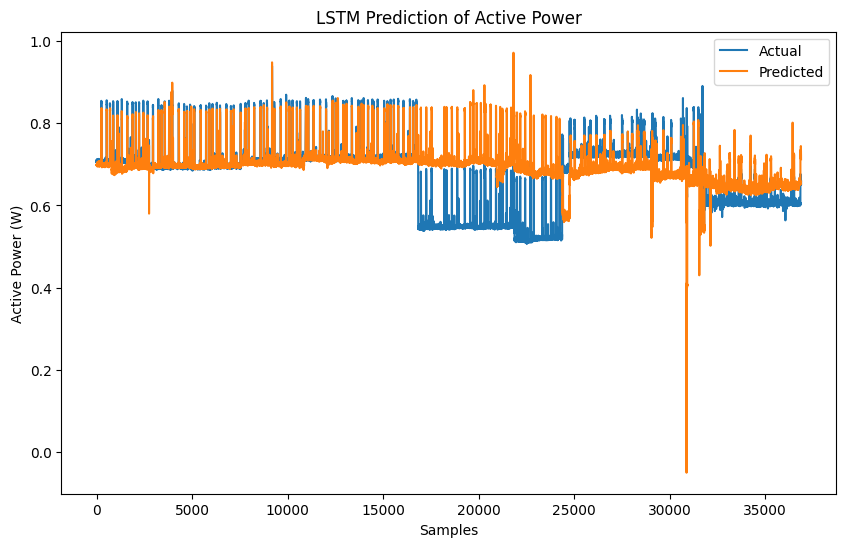

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load and preprocess dataset
df = pd.read_csv("dataset_clean_normalized.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = pd.get_dummies(df, columns=['energy_source'])
df.drop(columns=['timestamp', 'Current_A', 'Voltage_V', 'Power_Factor'], inplace=True)

# 2. Define target and features
target_col = 'Active_Power_W'
features = df.drop(columns=[target_col])
target = df[target_col]

# 3. Scale features and target (LSTM needs scaled data)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# 4. Prepare sequences (time windows) for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# 5. Split into train and test sets (80/20)
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

# 6. Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 7. Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

# 8. Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# 9. Evaluate (fixed RMSE calculation for compatibility)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"LSTM Results - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# 10. Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("LSTM Prediction of Active Power")
plt.xlabel("Samples")
plt.ylabel("Active Power (W)")
plt.legend()
plt.show()


In [ ]:
# 7. Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

# Save the trained model
model.save('lstm_active_power_model.h5')
print("Model saved to lstm_active_power_model.h5")


Epoch 1/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0029 - val_loss: 0.0070
Epoch 2/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0027 - val_loss: 0.0064
Epoch 3/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0025 - val_loss: 0.0060
Epoch 4/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0026 - val_loss: 0.0068
Epoch 5/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 6/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0096 - val_loss: 0.0087
Epoch 7/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.0024 - val_loss: 0.0070
Epoch 8/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0024 - val_loss: 0.0075
Epoch 9/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.0024 - val_loss: 0.0072
Epoch 10/10
2306/2306 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0030 - val_loss: 0.0080


Model saved to lstm_active_power_model.h5
